In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import os
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# download German stop words
nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('german'))

# create a list of documents
documents = []



for file in os.listdir('comments_json_anonym'):
    text = ""

    with open('comments_json/'+file.split('_comments')[0]+'.txt','r',encoding='utf-8') as f:
        text += f.read()
    
    text += '\n'
    with open('comments_json_anonym/'+file,'r',encoding='utf-8') as f:
        data = json.load(f)
    for comment in data:
        text += comment['text']
        if 'answers' in comment:
            for answer in comment['answers']:
                text += answer['text']

    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
            
    documents.append(" ".join(filtered_words))

# create the tf-idf vectorizer
vectorizer = TfidfVectorizer()

# fit the vectorizer to the documents
tfidf = vectorizer.fit_transform(documents)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\morit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\morit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


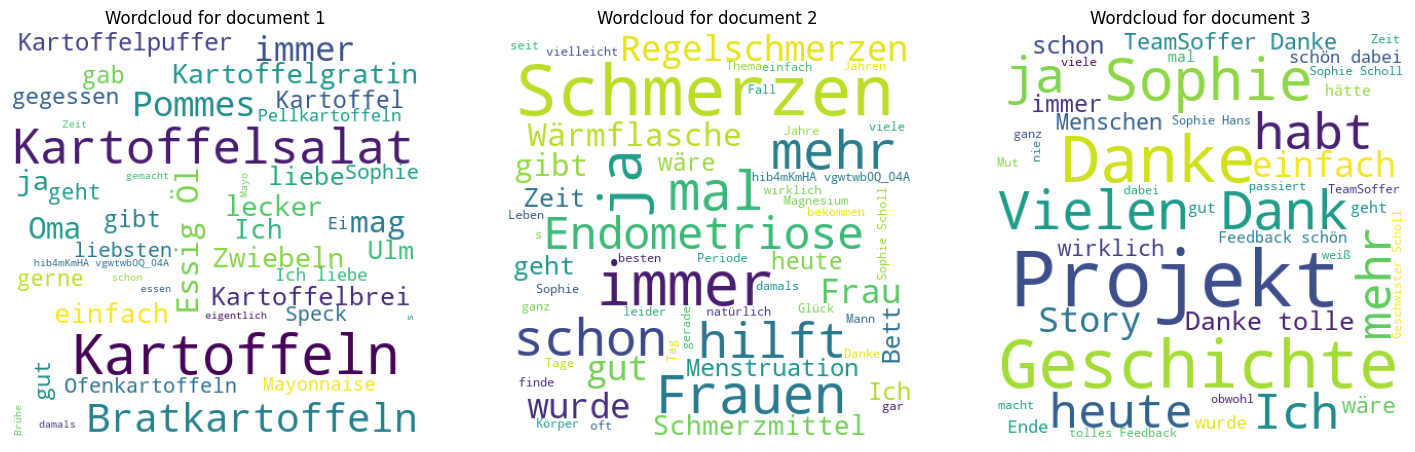

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

docs = [documents[177],documents[187],documents[382]]
# create a grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18,8))

for doc_index in range(len(docs)):
    wordcloud = WordCloud(width = 400, height = 400,
        background_color ='white',
        stopwords = None,
        min_font_size = 10).generate(docs[doc_index])
    axs[doc_index].imshow(wordcloud)
    axs[doc_index].axis("off")
    axs[doc_index].set_title(f'Wordcloud for document {doc_index+1}')


plt.show()

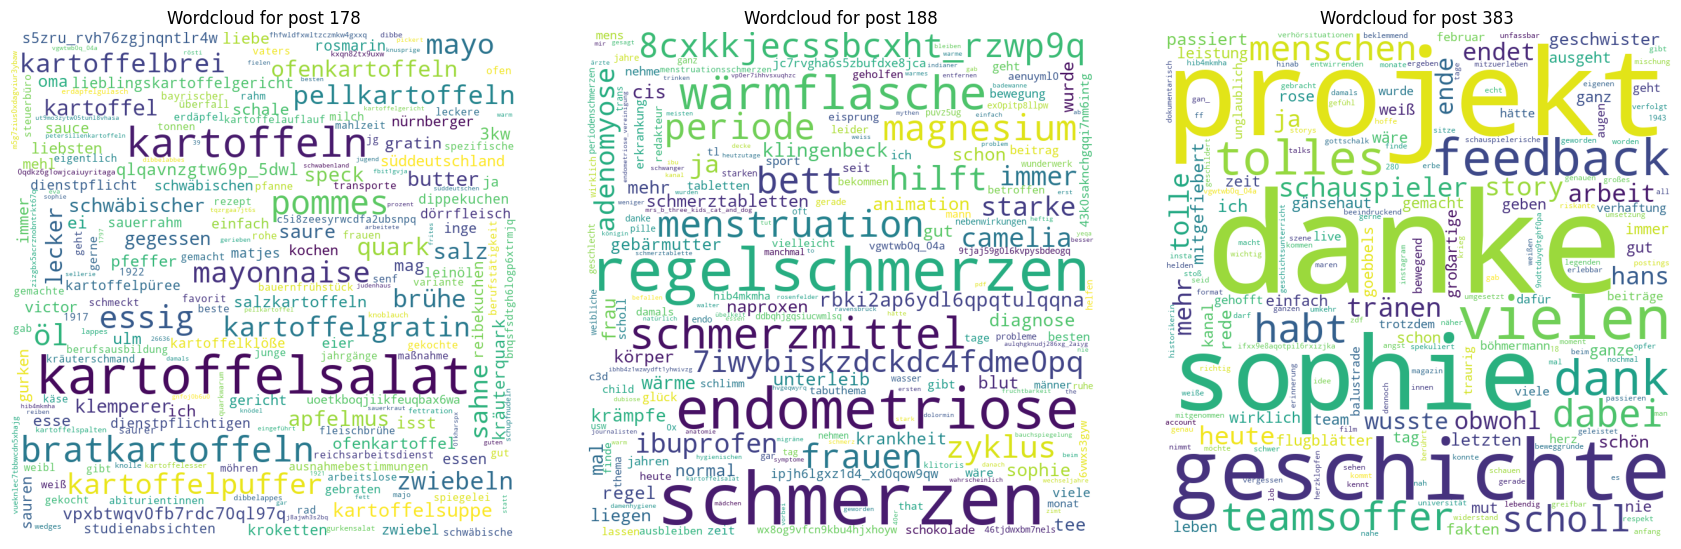

In [22]:
import pandas as pd

docids = [177,187,382]
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18,8))

for i,id in enumerate(docids):
        df = pd.DataFrame(tfidf[id].T.todense(), index=vectorizer.get_feature_names_out(), columns=["TF-IDF"])
        df = df.sort_values('TF-IDF', ascending=False)
        doc_dict = df.to_dict()

        wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate_from_frequencies(doc_dict['TF-IDF'])
        axs[i].imshow(wordcloud)
        axs[i].axis("off")
        axs[i].set_title(f'Wordcloud for post {id+1}')
# Plot the wordcloud
plt.axis("off")
plt.tight_layout(pad = 5)
plt.show()

In [23]:
top_20_terms = {}
for id in range(len(documents)):
    test = pd.DataFrame(tfidf[id].T.todense(),index=vectorizer.get_feature_names_out(),columns=["TF-IDF"])
    test = test.sort_values("TF-IDF",ascending=False)
    top_20_terms[id+1] = test.head(20).index

In [24]:
test = pd.DataFrame.from_dict(top_20_terms).replace("hib4mKmHA-vgwtwb0Q_04A==","IBSS").T
test.to_csv('./top20-terms-per-doc_tf-idf_posts-caption-combined.csv')
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,idee,projekt,tolle,eva,gespannt,toi,stories,tolles,geschichte,super,wow,mfayuyo_pyvhyh6kom_acw,was,danke,genial,mega,umsetzung,zpikr8,npg,s4icm8xecsy
2,projekt,0taqtzqqe6cxa,cy9hacx7,75mrfspwrghl8ssvzevewq,idee,n25xdsdvkgyt5ffs6aenhw,atljqmohgbx2workrz4gkq,instagram,tolle,standort,geschichte,zcfr4ublr59qhjuwspspoa,bktxw164glwlkqke_s2xxg,ficxkmwmqon4sy8t0spgaa,vermeidlich,bvogh5nstbwnpv8hodi2aw,mfj0rvwq70ct3_qe90ceug,israel,super,tolles
3,projekt,uyvijiobcrdbvbkoid2cbw,idee,tolles,gespannt,jana,cooles,kassel,rehau,tolle,sophie,danke,geschichte,qj3cbfx8ttslvjj6yfvjcq,mal,coole,super,begeistert,umsetzung,amcbmlhxi1cdvoax6tkjma
4,inge,idee,projekt,fmjlwaqazfddpiryqtu,harmoniemonster,mq,90ime0r,3sjjmckujeg,od,wil,interviews,mijn,ben,ik,tolle,want,anne,je,mega,ältere
5,the,and,were,vaterland,fritz,to,of,visited,after,daughter,taught,germany,fürs,evidence,group,captain,iller,kazbuuwmcbbhlfzqnh8j_g,who,idee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,grimminger,hirzel,verurteilt,jenny,gefängnis,eugen,zuchthaus,aowfb45s_clcfosxazp5jq,freiheitsstrafe,rose,personen,vergebens,hans,inhaftiert,schmorell,angerichtet,zeller,wurde,graf,scholl
398,s2v,cvbqq_63sad8adjxdw,inge,aicher,besucher,otl,gendern,scholl,geschwister,hochschule,aktueller,gründet,zitat,hans,jreikh9zq9mbw6s4bnpgw,sippenhaft,männlich,fakt,löste,projekt
399,leipelt,jahn,hans,luise,margaretha,rothe,marie,donauwörth,halbjude,rww9gejbzaumevaqj6ihiq,hamburger,stolpersteine,leipelts,hamburg,qjq,d3ir_7el3wcagmxpr,weißen,rose,wurde,kucharski
400,geschwister,scholl,rose,schule,weißen,gymnasium,fc6ze2ozm3673l62o8yfig,sophie,platz,denkmal,dhtiuvhxouy4bkg5pwn4sg,marburg,geschichte,münchner,83qn_fodbsc6otzdjiwuyq,weiße,universität,projekt,kopien,danke
